Übung 3
------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

**Helper Functions**

In [2]:
def add_noise(image, sigma):
    mean = 0
    gauss = np.random.normal(mean,sigma, image.shape)
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255)
    return noisy

def show_imgs_horizontally(imgs, captions=None):
    n_imgs = len(imgs)
    if not captions:
        captions = ["" for _ in range(n_imgs)]
    assert n_imgs == len(captions), "imgs and captions have different lengths!"
    fig, axes = plt.subplots(1, n_imgs)
    for idx, ax in enumerate(axes):
        img = imgs[idx]
        is_gray = len(img.shape) == 2
        kwargs = {'cmap' : 'gray'} if is_gray else {}
        ax.imshow(imgs[idx], **kwargs)
        ax.set_title(captions[idx])
        ax.axis('off')
    fig.tight_layout()

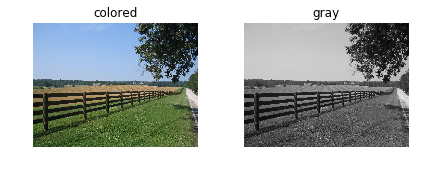

In [3]:
#prepare images
img = cv2.imread("fence.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_imgs_horizontally(
    [img, img_gray],
    ['colored', 'gray']
)

### 3.1 Median-Filter (10 Punkte)
Der Median-Filter ist ein einfacher nichtlinearer Filter, der sich gut eignet, um bestimmte Arten von
Bildrauschen zuentfernen.

* Implementiere einen Median-Filter, ohne medianBlur zu verwenden.

In [4]:
median_2d_vectorized = np.vectorize(np.median, signature='(n,m)->()')
def median_filter(in_img, k_size):
    assert len(in_img.shape) == 2, "img must be 2D"
    out_shape = np.array(in_img.shape) - [k_size, k_size] + [1, 1]
    neighborhoods = np.array([[
        in_img[row:row+k_size, col:col+k_size]
        for col in range(out_shape[1]) ]
        for row in range(out_shape[0])])
    out_img = median_2d_vectorized(neighborhoods)
    return out_img

* Wende den Median-Filter auf ein Graustufenbild an.

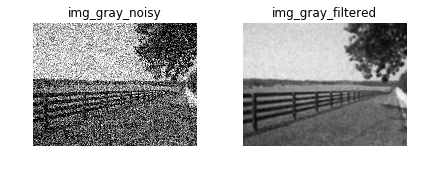

In [5]:
img_gray_noisy = add_noise(img_gray, 50)
img_gray_filtered = median_filter(img_gray_noisy, 15)
show_imgs_horizontally(
    [img_gray_noisy, img_gray_filtered],
    ["img_gray_noisy", "img_gray_filtered"])

* Wende den Median-Filter auf die einzelnen Kanäle eines Farbbilds an


* Wie kann man ungewollte Farbverschiebungen vermeiden?


* Für welche Arten von Rauschen eignet sich der Median-Filter gut, für welche nicht?

### 3.2 Hough-Transformation (10 Punkte)  
Die Hough-Transformation kann für das Finden von Linien in Bildern verwendet werden.
In dieser Aufgabe sollst du die Hough-Transformation implementieren ohne die Funktionen HoughLines
oder HoughLinesP zu verwenden.


* Erzeuge ein Kantenbild. Verwende dazu einen Filter deiner Wahl. Begründe die Wahl des Kantendetektors.


* Transformiere das Kantenbild in den Hough-Raum und zeige diesen in einer geeigneten Color Map
an.

*  Finde die markantesten Linien und zeichne diese in das Originalbild ein.